In [1]:
#import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv file
data=pd.read_csv('Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# check some basic informations
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
#checking null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### 1. K-Means Clustering

In [8]:
from sklearn.cluster import KMeans

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


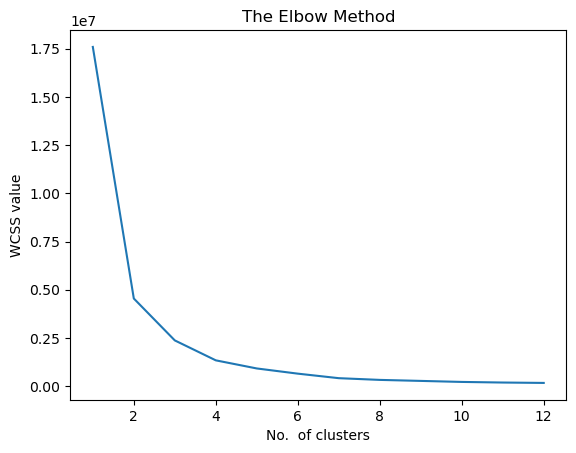

In [9]:
wcss = []
for i in range (1,13):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No.  of clusters')
plt.ylabel('WCSS value')
plt.show()

#### optimal number of clusters = 2

In [10]:
# data is converted to a numpy array
data = data.iloc[:,:].values

In [11]:
type(data)

numpy.ndarray

In [12]:
kmeans = KMeans(n_clusters=2, init='k-means++',random_state=42)
y_kmeans =   kmeans.fit_predict(data)

In [13]:
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [14]:
# silhoouette score

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
sil_avg_kmeans= silhouette_score(data, y_kmeans)

In [17]:
print(sil_avg_kmeans)

0.6568536504294317


### 2. Agglomerative Hierarchical Clustering

In [18]:
# Drawing Dendrogram
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'eucledian distance')

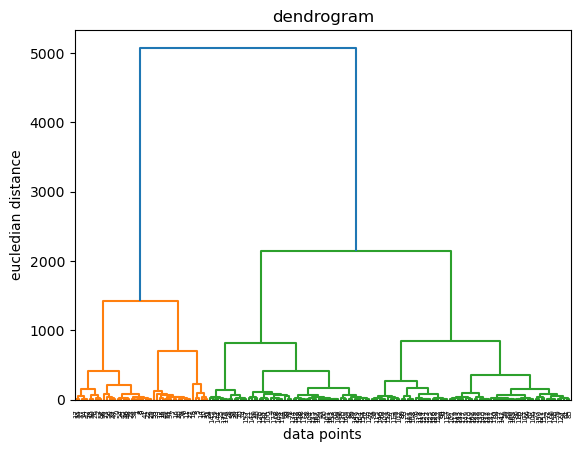

In [19]:
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('eucledian distance')

### optimal number of clusters = 2 

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
hc=AgglomerativeClustering(n_clusters =2, affinity='euclidean',linkage='ward')
y_hc= hc.fit_predict(data)

In [22]:
y_hc= hc.fit_predict(data)

In [23]:
sil_avg_hc= silhouette_score(data, y_hc)

In [24]:
print(sil_avg_hc)

0.6587292996216912


### 3. DBSCAN clustering 

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
dbscan =DBSCAN()

In [27]:
# find distaces between a data point and it's nearest neighbors

In [28]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

In [29]:
# plot k-distance graph to find optimal number of epsilons

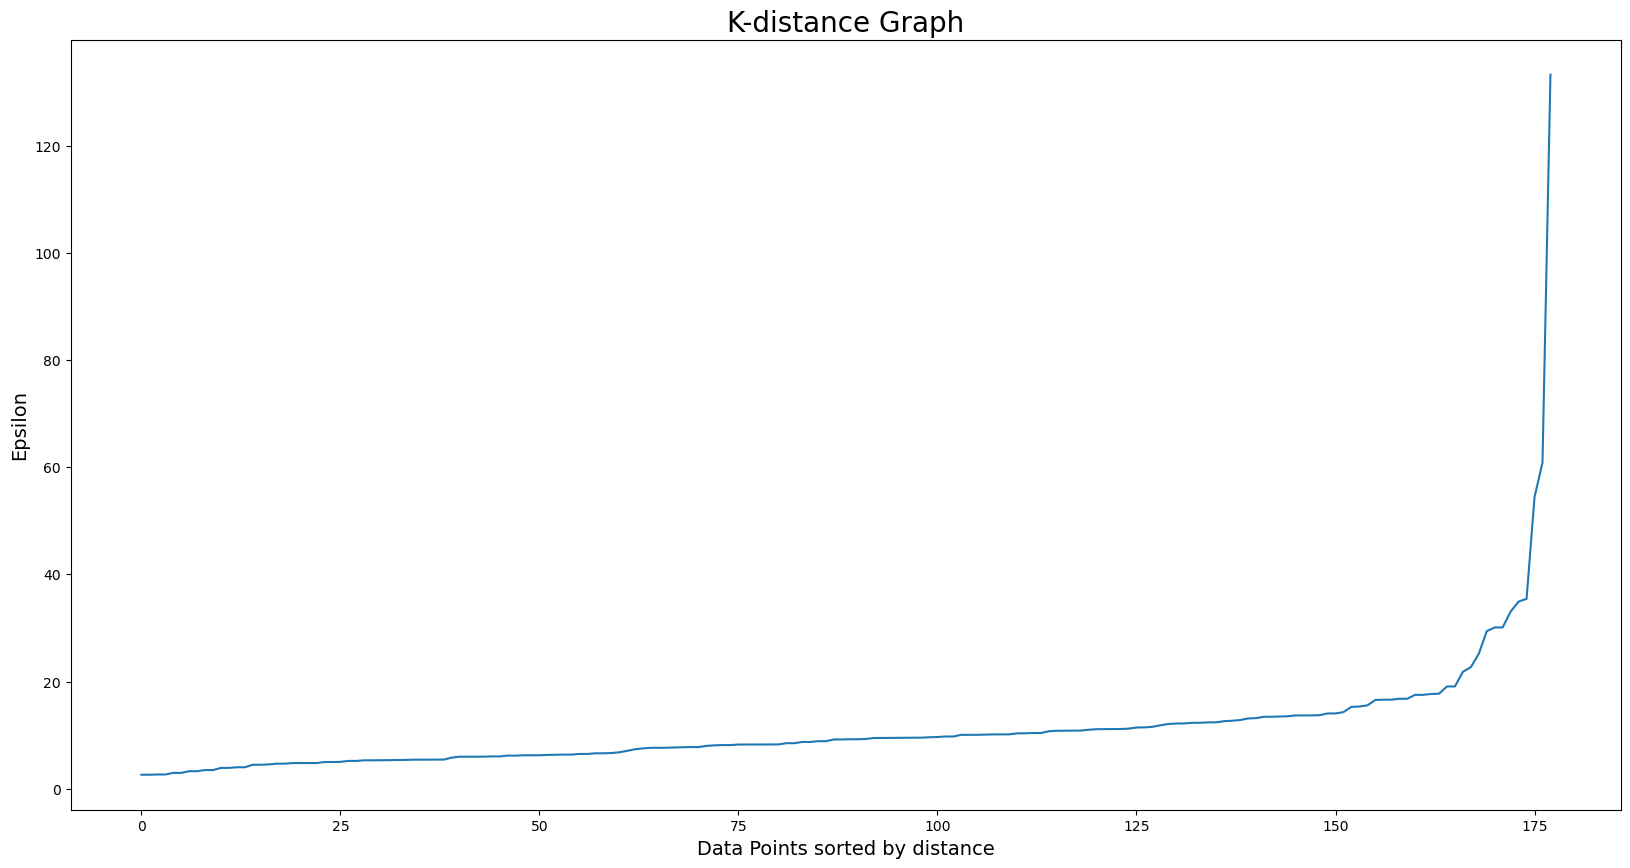

In [30]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

### optimal value for eps =30

In [31]:
dbscan=DBSCAN(eps=35,min_samples=3)

In [32]:
y_dbscan = dbscan.fit_predict(data)

In [33]:
print(y_dbscan)

[ 0  0  1  2  3  2  4  4  0  0  2  4  4  0  2  4  4  0 -1  5  3  3  0  0
  5  5  1  4  5  0  4  2  0  4  0  5  5  0  0  3  3  0  0  3  5  0  0  0
  0  4  0  4  1 -1  0  0  0  4  4  3  3  3  3  3  3  3  3  3  3 -1  5  3
  3  0  5  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 -1
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  5  5  3  3  3  3  3  3  3  3  3  3  3  5  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  5  5  3]


In [34]:
sil_avg_dbscan= silhouette_score(data, y_dbscan)

In [35]:
print(sil_avg_dbscan)

0.45067067652135456
